<a href="https://colab.research.google.com/github/Sonianegi1101/Sonianegi1101/blob/main/Project_1_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



Importing the California House Price Dataset

In [ ]:
housing = fetch_california_housing()
house_price_dataset = pd.DataFrame(housing.data, columns=housing.feature_names)


In [ ]:
print(house_price_dataset)

       MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  MedHouseVal
0      8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23        4.526
1      8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22        3.585
2      7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24        3.521
3      5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25        3.413
4      3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25        3.422
...       ...       ...       ...        ...  ...       ...       ...        ...          ...
20635  1.5603      25.0  5.045455   1.133333  ...  2.560606     39.48    -121.09        0.781
20636  2.5568      18.0  6.114035   1.315789  ...  3.122807     39.49    -121.21        0.771
20637  1.7000      17.0  5.205543   1.120092  ...  2.325635     39.43    -121.22        0.923
20638  1.8672      18.0  5.329513   1.171920  ...  2.123209 

In [ ]:
# Print first 5 rows of dataset
house_price_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Add the target of the dataset
house_price_dataset['MedHouseVal'] = housing.target

In [ ]:
# Adding the target column along the other columns
house_price_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Checking the no. of rows and columns in dataset
house_price_dataset.shape

(20640, 9)

In [ ]:
# Check for missing values
house_price_dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
#Statistical measures
house_price_dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding correlations between various features in the dataset




1. Positive Correlation  
2. Negartive Correlation



In [ ]:
correlation = house_price_dataset.corr()

<Axes: >

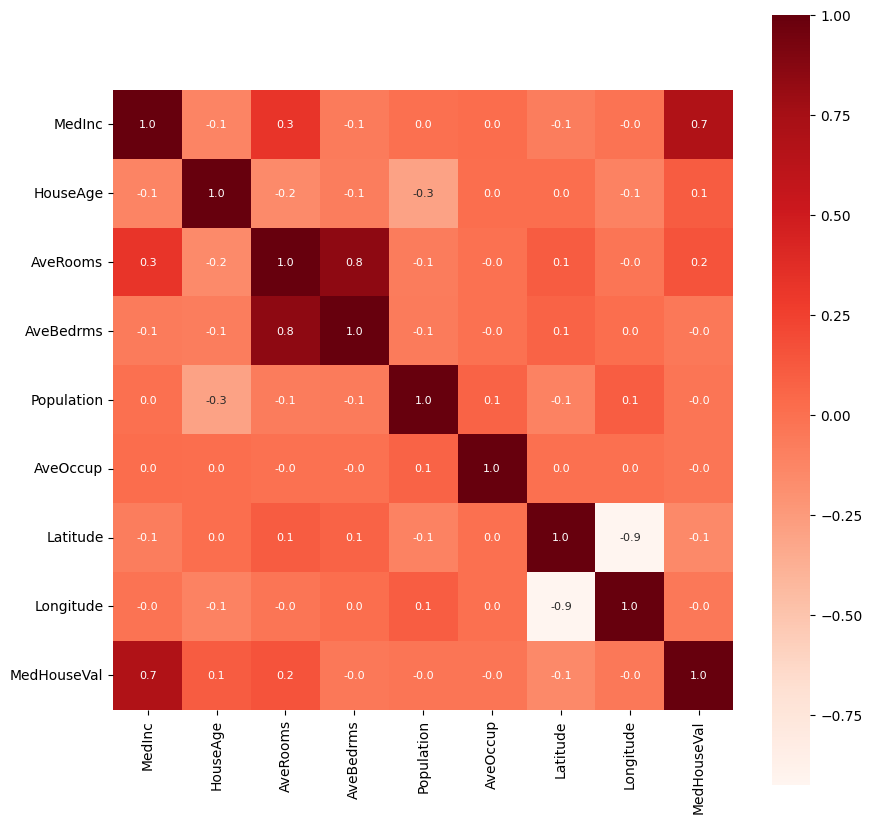

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Reds')

Splitting the data and target

In [ ]:
X = house_price_dataset.drop(['MedHouseVal'], axis=1)
Y = house_price_dataset['MedHouseVal']
# axis = 1 for droping (excluding) a particular column
# axis = 0 for dropping (excluding) a particular row

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

Splitting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model= XGBRegressor()

In [ ]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [ ]:
# accuraccy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error :", score_1)
print("Mean Absolute error :", score_2)

R squared error : 0.943650140819218
Mean Absolute error : 0.1933648700612105


Visualizing the actual prices and predicted prices

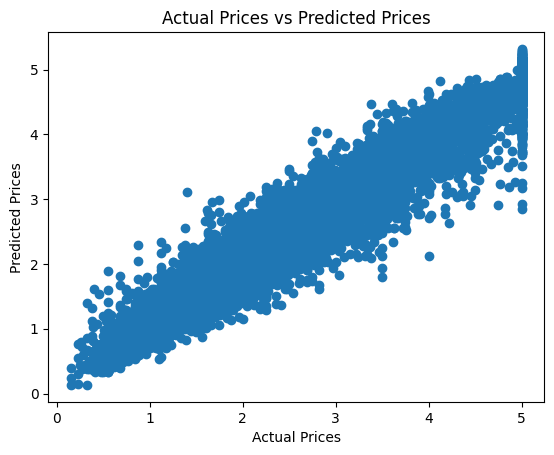

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on test data

In [ ]:
# accuraccy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error :", score_1)
print("Mean Absolute error :", score_2)

R squared error : 0.8338000331788725
Mean Absolute error : 0.3108631800268186
